In [31]:
import numpy as np
import pandas as pd
import csv
import glob
import igl
import math
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d 
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import geopandas as gpd
import os

<Axes: >

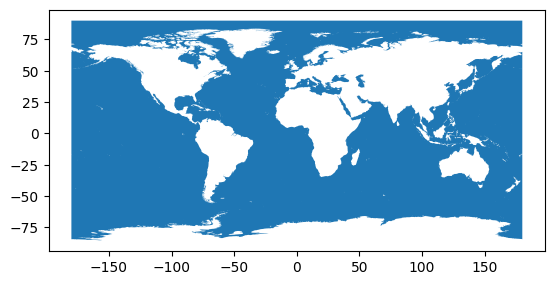

In [32]:
# Read the shapefile
current_dir = os.getcwd()
folder_path = os.path.join(current_dir, "ocean")
path = os.path.join(folder_path, "ne_10m_ocean.shp")
shp = gpd.read_file(path)

shp.plot()

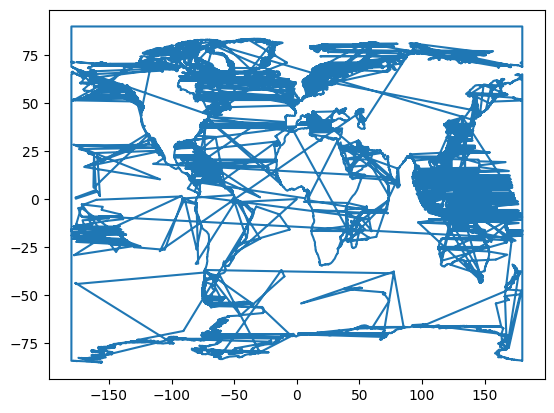

In [30]:
# Read the shapefile
current_dir = os.getcwd()
folder_path = os.path.join(current_dir, "ocean")
path = os.path.join(folder_path, "ne_10m_ocean.shp")
ocean = shapefile.Reader(path)

#records = ocean.records()
#shapes = ocean.shapes()

# Plot each shape using matplotlib
fig = plt.figure()
ax = fig.add_subplot(111)

for shape in ocean.shapeRecords():
    x = [i[0] for i in shape.shape.points[:]]
    y = [i[1] for i in shape.shape.points[:]]
    ax.plot(x, y)
            
plt.show()

In [11]:
# csv file location
current_dir = os.getcwd()
folder_path = os.path.join(current_dir, "Whale")

# path = os.path.join(folder_path, "Blue and fin whales Southern California 2014-2015 - Argos data-reference-data.csv")
# with open(path, 'r') as file:
#     csvreader = csv.reader(file)
#     data = []
#     for row in csvreader:
#         data.append(row)
#     data = np.array(data)

# read all csv files in the folder
for file_name in os.listdir(folder_path):
    if file_name.endswith(".csv"):
        file_path = os.path.join(folder_path, file_name)
        with open(file_path, 'r') as file:
            csvreader = csv.reader(file)
            for row in csvreader:
                # Append the row to the data array, skipping the header row
                if csvreader.line_num > 1:
                    data = np.vstack((data, np.array(row)))

In [12]:
#Source: https://www.geeksforgeeks.org/how-to-read-all-csv-files-in-a-folder-in-pandas/
# use glob to get all the csv files 
# in the folder
current_dir  = os.getcwd()
csv_files = glob.glob(os.path.join(current_dir, "Whale", "*.csv"))
  
# loop over the list of csv files
for f in csv_files:
      
    # read the csv file
    df = pd.read_csv(f)
    
    df = np.array(df)

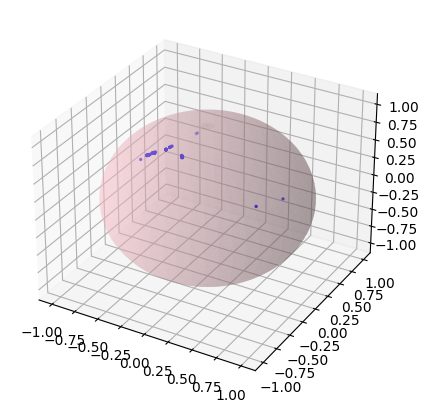

In [19]:
# get the longitude and latitude
long = data[1:,41]
lat = data[1:,40]

# convert to polar coordinates
long = 180 + long.astype(float)
lat = 90 + lat.astype(float)

# convert to radians
long = np.deg2rad(long)
lat = np.deg2rad(lat)

# convert to cartesian coordinates
x = np.cos(lat) * np.cos(long)
y = np.cos(lat) * np.sin(long)
z = np.sin(lat)

# Create a sphere
r = 1
u, v = np.mgrid[0:2*np.pi:100j, 0:np.pi:50j]
xs = r*np.cos(u)*np.sin(v)
ys = r*np.sin(u)*np.sin(v)
zs = r*np.cos(v)

# plot
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(xs, ys, zs, color='pink', alpha=0.3, label='Sphere')
# ax.set_xlim3d(-1, 1)
# ax.set_ylim3d(-1, 1)
# ax.set_zlim3d(-1, 1)
ax.scatter(x, y, z, s=2, color='b', label='Data')
plt.show()